# Insurance Cost Analysis

### Objective: To perform data analytics on a medical insurance charges dataset

#### Steps:
#### 1. Import all the required libraries
#### 2. Load the data as a pandas dataframe
#### 3. Clean the data, taking care of the blank entries
#### 4. Run exploratory data analysis and identify the attributes that most affect the charges
#### 5. Develop single variable and multi variable Linear Regression models for predicting the charges
#### 6. Use Pipeline Model/Ridge Regression if required
#### 7. Next Steps

### The parameters used in the dataset are:

#### Age: Age of the insured. Integer quantity.

#### Gender: Gender of the insured. This parameter has been mapped to numerical values in the following way.

#### Gender	Assigned Value:
Female	1
Male	2

#### BMI: Body Mass Index of the insured. Float value quantity.

#### No_of_Children: Number of children the insured person has. Integer quantity.

#### Smoker: Whether the insured person is a smoker or not. This parameter has been mapped to numerical values in the following way.

#### Smoker	Assigned Value:
Smoker	0
Non smoker	1

#### Region: Which region of the USA does the insured belong to. This parameter has been mapped to numerical values in the following way.

#### Region	Assigned Value:
Northwest	1
Northeast	2
Southwest	3
Southeast	4

#### Charges: Charges for the insurance in USD. Floating value quantity.

# Step 1: Import the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

# Step 2: Load the Dataset and Add Headers

In [113]:
headers = ['Age','Gender','BMI','No_of_Children','Smoker','Region','Charges']

In [114]:
df = pd.read_csv(r"C:\Users\mrakk\OneDrive - srsny.org\Desktop\Datasets\medical_insurance_dataset.csv",names=headers,header=0)
df['Charges'] = round(df['Charges'],2)
df.head(10)

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,?,4,3756.62
5,46,1,33.440,1,0,4,8240.59
6,37,1,27.740,3,0,1,7281.51
7,37,2,29.830,2,0,2,6406.41
8,60,1,25.840,0,0,1,28923.14
9,25,2,26.220,0,0,2,2721.32


# Step 3: Clean the data, taking care of the blank entries

In [115]:
df[df[headers]=='?'].count()

Age               4
Gender            0
BMI               0
No_of_Children    0
Smoker            7
Region            0
Charges           0
dtype: int64

In [116]:
df = df.replace('?',np.NaN)

In [117]:
df.head(10)

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,NaN,4,3756.62
5,46,1,33.440,1,0,4,8240.59
6,37,1,27.740,3,0,1,7281.51
7,37,2,29.830,2,0,2,6406.41
8,60,1,25.840,0,0,1,28923.14
9,25,2,26.220,0,0,2,2721.32


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2767 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


## Replace Missing Age Values with the Mean and Smoker Values with the Most Frequent One

In [121]:
mean_age = df['Age'].astype('float').mean(axis=0)
mean_age

39.11709432598482

In [123]:
df['Age'].replace(np.NaN,mean_age,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [126]:
max_smoker = df['Smoker'].value_counts().idxmax()
max_smoker

'0'

In [127]:
df['Smoker'].replace(np.NaN,max_smoker,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2771 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [129]:
df[['Age','Smoker']] = df[['Age','Smoker']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   int32  
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2771 non-null   int32  
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


# Step 4: Run EDA

## Identify the attributes that most affect the charges
### Check Correlation of Different Variables with Charges

In [152]:
df.corr()

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
Age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
Gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
BMI,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
No_of_Children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
Smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
Region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
Charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


### Observation:
###### 1. Age (0.3), BMI (0.2) and Smoker population have a significant positive correlation with Charges out of which, Smokers show the strongest correlation of ~0.8
###### 2. All other variables have an insignificant positive correlation 

### Regression Plot of Different Variables with Charges

###### 1. Age (x: Independent variable) & Charges (y: Dependent Variable)

(0.0, 66902.85800000001)

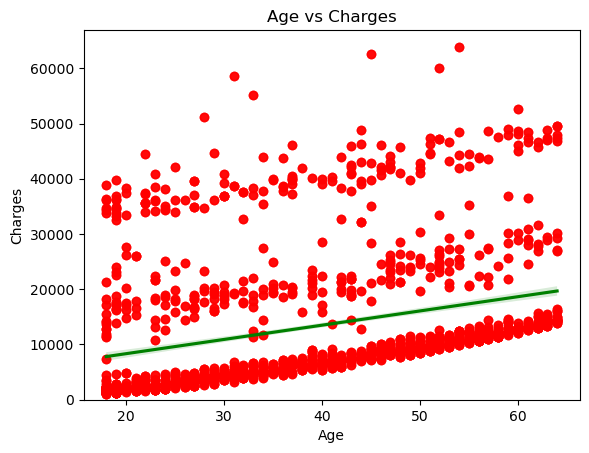

In [156]:
sns.regplot(x=df['Age'],y=df['Charges'],data=df,scatter_kws={'color':'red'},line_kws={'color':'green'})
plt.title('Age vs Charges')
plt.ylim(0,)

##### 2. BMI (x: Independent variable) & Charges (y: Dependent Variable)

(0.0, 66902.85800000001)

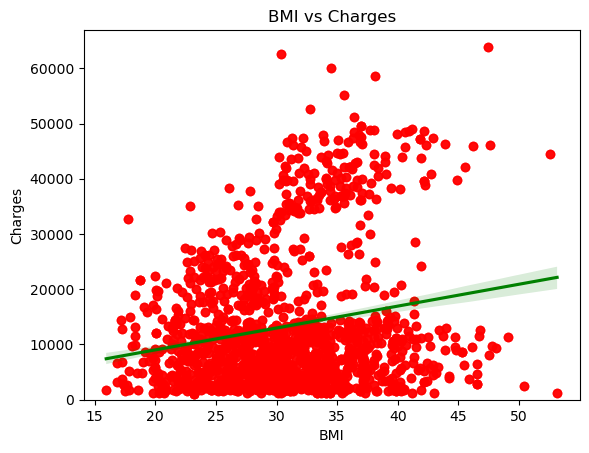

In [324]:
sns.regplot(x=df['BMI'],y=df['Charges'],data=df,scatter_kws={'color':'red'},line_kws={'color':'green'})
plt.title('BMI vs Charges')
plt.ylim(0,)

##### 3. Smoker (x: Independent variable) & Charges (y: Dependent Variable)

Text(0.5, 1.0, 'Smoker vs Charges')

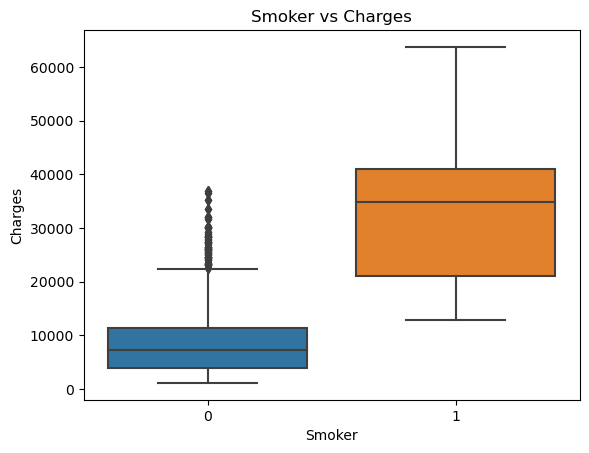

In [154]:
sns.boxplot(x='Smoker',y='Charges',data=df)
plt.title('Smoker vs Charges')

### Observation:

###### No smokers pay less insurance than the smokers.

# Step 5: Univariate and Multivariate Linear Regression Models for Predicting the Charges

### Univariate: Charges for Smokers/Non-Smokers

In [290]:
x = df[['Smoker']]
y = df['Charges']

#Split the train and test set by 80:20 ratio.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Fit the train sets on the Linear Regression Model.

lm = LinearRegression()

lm.fit(x,y)

LinearRegression()

In [291]:
pred1 = lm.predict(x)

# Find the intercept and coefficient for the predictions

lm.intercept_ # 8417.874393

lm.coef_ # 23832.50915928

# Form the Linear Regression Equation to predict the Charges...!

df['Pred_Charges_Smokers'] = lm.intercept_ + lm.coef_*x

### Check the R-sqaured Value

In [292]:
r2_Smoke = r2_score(df['Charges'], pred1)
r2_Smoke

0.6227430402464125

### Check the Fitness of the Model

<Axes: xlabel='Charges', ylabel='Density'>

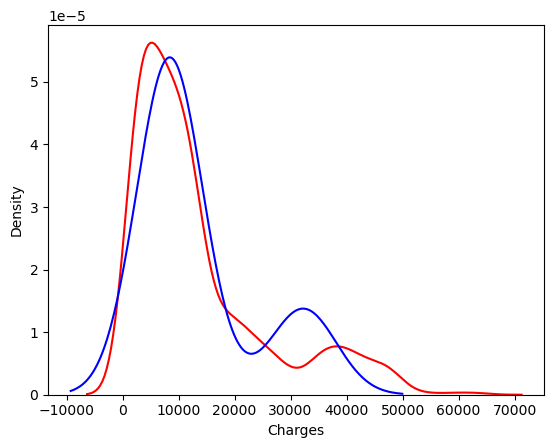

In [293]:
dist1 = sns.kdeplot(df['Charges'],color='r',label='Actual')
sns.kdeplot(pred1,color='b',label='Fitted',ax=dist1,bw_adjust=3)

### Observation:
###### The model explains 62% of the variability in 'Charges' based on 'Smoking Status'. This means that 'Smoking Status' is a fairly significant predictor of 'Charges', but there are other factors that also influence 'Charges' which are not captured by this model.
###### 38% Unexplained: The remaining 38% of the variability in 'Charges' is due to other factors not included in the model.
###### It suggests a moderate fit. While the model is not perfect, it captures a substantial portion of the variation in 'Charges' based on 'Smoking Status'.

### Univariate: Charges by Age

In [250]:
a = df[['Age']]
y = df['Charges']

#Split the train and test set by 80:20 ratio.

a_train,a_test,y_train,y_test = train_test_split(a,y,test_size=0.2,random_state=42)

# Fit the train sets on the Linear Regression Model.

lm = LinearRegression()

lm.fit(a,y)

pred2 = lm.predict(a)

# Find the intercept and coefficient for the predictions

lm.intercept_ # 3166.971977438623

lm.coef_ # 258.02361085

# Form the Linear Regression Equation to predict the Charges...!

df['Pred_Charges_Age'] = lm.intercept_ + lm.coef_*a

In [251]:
r2_Age = r2_score(df['Charges'], pred2)
r2_Age

0.08933657371853998

<Axes: xlabel='Charges', ylabel='Density'>

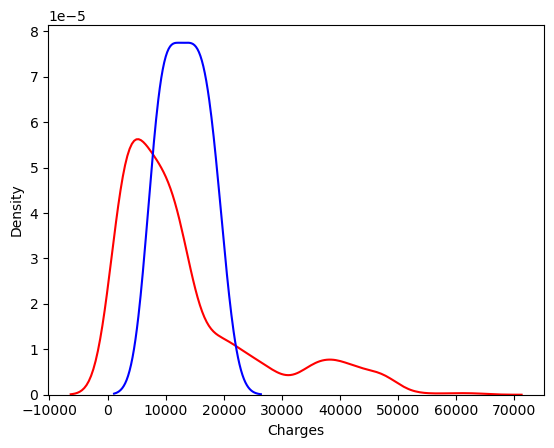

In [252]:
dist2 = sns.kdeplot(df['Charges'],color='r',label='Actual')
sns.kdeplot(pred2,color='b',label='Fitted',ax=dist2,bw_adjust=3)

### Observation:
###### The model explains 9% of the variability in 'Charges' based on 'Age'. This means that 'Age' is a weak predictor of 'Charges', and other factors that also influence 'Charges' are not captured by this model.
###### 91% Unexplained: The remaining 91% of the variability in 'Charges' is due to other factors not included in the model.
###### It suggests a weak fit.

### Univariate: Charges by BMI

In [286]:
b = df[['BMI']]
y = df['Charges']

#Split the train and test set by 80:20 ratio.

b_train,b_test,y_train,y_test = train_test_split(b,y,test_size=0.2,random_state=42)

# Fit the train sets on the Linear Regression Model.

lm = LinearRegression()

lm.fit(b,y)

LinearRegression()

In [287]:
pred3 = lm.predict(b)

# Find the intercept and coefficient for the predictions

lm.intercept_ # 1091.8976039925547

lm.coef_ # 396.32668697

# Form the Linear Regression Equation to predict the Charges...!

df['Pred_Charges_BMI'] = lm.intercept_ + lm.coef_*b

In [288]:
r2_BMI = r2_score(df['Charges'], pred3)
r2_BMI

0.03996240760628611

<Axes: xlabel='Charges', ylabel='Density'>

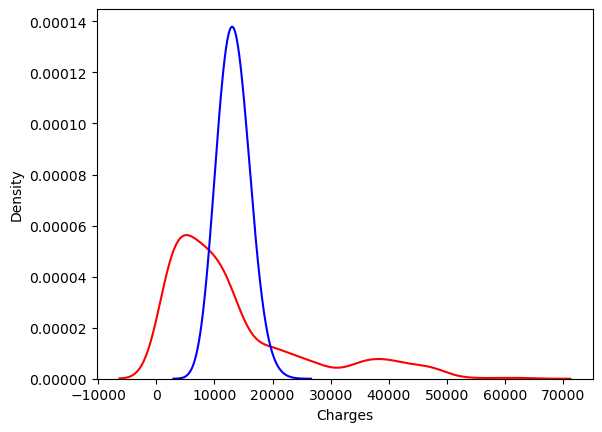

In [289]:
dist3 = sns.kdeplot(df['Charges'],color='r',label='Actual')
sns.kdeplot(pred3,color='b',label='Fitted',ax=dist3,bw_adjust=3)

### Observation:
###### The model explains only 4% of the variability in 'Charges' based on 'BMI'. This means that 'BMI' is a weak predictor of 'Charges', and other factors that also influence 'Charges' are not captured by this model.
###### 96% Unexplained: The remaining 96% of the variability in 'Charges' is due to other factors not included in the model.
###### It suggests a weak fit.

### Multivariate: Multiple Correlated Variables with Charges

In [283]:
c = df[['Age','BMI','Smoker']]
y = df['Charges']

#Split the train and test set by 80:20 ratio.

c_train,c_test,y_train,y_test = train_test_split(c,y,test_size=0.2,random_state=42)

# Fit the train sets on the Linear Regression Model.

lm = LinearRegression()

lm.fit(c,y)


LinearRegression()

In [284]:
pred4 = lm.predict(c)

# Find the intercept and coefficient for the predictions

lm.intercept_ # -11248.26203949022

lm.coef_ # 258.02593787, 310.83764293, 23977.73235704

# Form the Linear Regression Equation to predict the Charges...!

df['Pred_Charges_All_V'] = -11248.26203949022 + 258.02593787*df['Age'] + 310.83764293*df['BMI'] + 23977.73235704*df['Smoker']

In [285]:
df

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges,Pred_Charges_Smokers,Pred_Charges_Age,Pred_Charges_BMI,Pred_Charges_All_V
0,18,2,33.770,1,0,4,1725.55,8417.874393,7811.396973,14475.849823,3893.192044
1,28,2,33.000,3,0,4,4449.46,8417.874393,10391.633081,14170.678274,6234.106438
2,33,2,22.705,0,0,1,21984.47,8417.874393,11681.751135,10090.495032,4324.162593
3,32,2,28.880,0,0,1,3866.86,8417.874393,11423.727525,12537.812324,5985.559100
4,31,1,25.740,0,0,4,3756.62,8417.874393,11165.703914,11293.346527,4751.502963
...,...,...,...,...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86,8417.874393,15294.081687,19053.423058,14966.119018
2767,21,1,34.600,0,0,3,2020.18,8417.874393,8585.467805,14804.800973,4925.265101
2768,19,2,26.030,1,1,1,16450.89,32250.383552,8069.420584,11408.281266,25723.066983
2769,23,2,18.715,0,0,1,21595.38,8417.874393,9101.515027,8509.151551,503.661019


In [269]:
r2_All_V = r2_score(df['Charges'], pred4)
r2_All_V

0.7472174766062132

Text(0.5, 1.0, 'Smoker vs Charges')

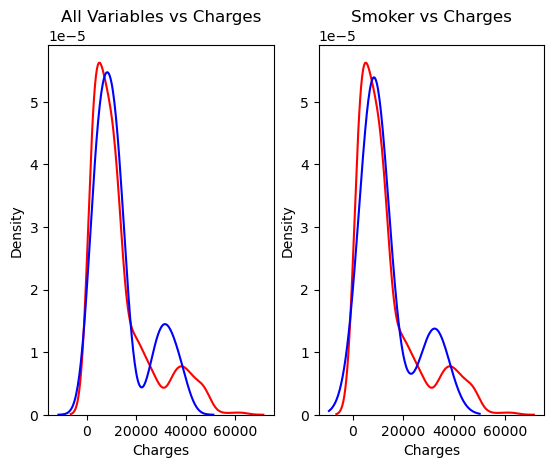

In [320]:
plt.subplot(1,2,1)
dist4 = sns.kdeplot(df['Charges'],color='r',label='Actual')
sns.kdeplot(pred4,color='b',label='Fitted',ax=dist4,bw_adjust=1.5)
plt.ylim(0,)
plt.title('All Variables vs Charges')

plt.subplot(1,2,2)
dist1 = sns.kdeplot(df['Charges'],color='r',label='Actual')
sns.kdeplot(pred1,color='b',label='Fitted',ax=dist1,bw_adjust=3)
plt.ylim(0,)
plt.title('Smoker vs Charges')

### Observation:
###### The multivariate model gives high R-Squared score of 75% and a better fit at the tails in comparison to the Smoker vs Charges model which is explained by taking multiple variables into account. However, as we can already see the BMI vs Charges Regression plot doesn't really give a linear relationship and shows more variability moving upwards, we can build a pipeline model with all the variable to explain the variability better and see the fitness of the predicted values.

# Step 6: Pipeline Model for Standardization of Higher Order Variables into Linear Regression

In [297]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

pipe=Pipeline(Input)

z = df[['Age','BMI','Smoker']]

pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [298]:
yhat = pipe.predict(z)

In [315]:
df['yhat'] = yhat

In [317]:
df

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges,Pred_Charges_Smokers,Pred_Charges_Age,Pred_Charges_BMI,Pred_Charges_All_V,yhat
0,18,2,33.770,1,0,4,1725.55,8417.874393,7811.396973,14475.849823,3893.192044,3556.500
1,28,2,33.000,3,0,4,4449.46,8417.874393,10391.633081,14170.678274,6234.106438,5560.125
2,33,2,22.705,0,0,1,21984.47,8417.874393,11681.751135,10090.495032,4324.162593,6161.375
3,32,2,28.880,0,0,1,3866.86,8417.874393,11423.727525,12537.812324,5985.559100,6484.500
4,31,1,25.740,0,0,4,3756.62,8417.874393,11165.703914,11293.346527,4751.502963,6081.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86,8417.874393,15294.081687,19053.423058,14966.119018,8982.750
2767,21,1,34.600,0,0,3,2020.18,8417.874393,8585.467805,14804.800973,4925.265101,4024.375
2768,19,2,26.030,1,1,1,16450.89,32250.383552,8069.420584,11408.281266,25723.066983,21046.750
2769,23,2,18.715,0,0,1,21595.38,8417.874393,9101.515027,8509.151551,503.661019,3587.750


In [300]:
r2_pipeline = r2_score(df['Charges'], yhat)
r2_pipeline

0.8381993988083795

Text(0.5, 1.0, 'All Variables Pipeline Model')

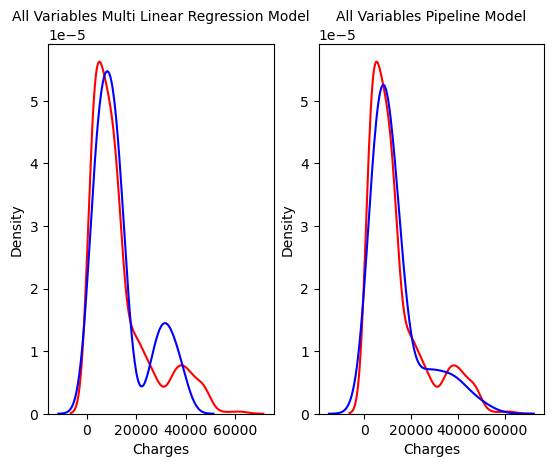

In [321]:
plt.subplot(1,2,1)
dist4 = sns.kdeplot(df['Charges'],color='r',label='Actual')
sns.kdeplot(pred4,color='b',label='Fitted',ax=dist4,bw_adjust=1.5)
plt.ylim(0,)
plt.title('All Variables Multi Linear Regression Model',fontsize=10)

plt.subplot(1,2,2)
dist5 = sns.kdeplot(df['Charges'],color='r',label='Actual')
sns.kdeplot(yhat,color='b',label='Fitted',ax=dist5,bw_adjust=2)
plt.title('All Variables Pipeline Model',fontsize=10)

### Observation:
###### The pipeline model gives high R-Squared score of 84% and a far better fit of the predicted values with the actual values and at the tails compared to the Multi Linear Regression Model.
###### The model can be refined further by adding more variables, however, we will limit to the highly correlated variables for now.

### Conclusion:
###### Pipeline model serves as a more appropriate model for our multiple variables. Multiple variable must be considered instead of one for more significant predictions. Age, BMI and Smoker status have a strong relation to the insurance charges, out of which, smoker status is highly related to the increased insurance charges because smoking is hazardous to health.

# Next Steps: The data can be further analysed based on individual variables. Some key questions which can be further answered are -

### 1. Number of Insured people per region
### 2. Number of Insured people per different age groups
### 3. Number of Insured people per different BMI groups
### 4. Number of Insured people per Males and Females